In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("data/clean_coffee_data.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.head(3)

,datetime,cash_type,card,money,coffee_name
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,3.87,Latte
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,3.87,Hot Chocolate
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,3.87,Hot Chocolate


In [119]:
grouped_coffee_name = df.groupby('coffee_name').agg({'money': 'sum'})
grouped_coffee_name = grouped_coffee_name.sort_values('money', ascending=False)
grouped_coffee_name = grouped_coffee_name.reset_index()
grouped_coffee_name.head(4)



,coffee_name,money
0,Latte,2787.60
1,Americano with Milk,2527.73
2,Cappuccino,1803.93
3,Americano,1507.25


<Axes: title={'center': 'Total Sales by Drink Type'}, xlabel='Drinks', ylabel='Dollars'>

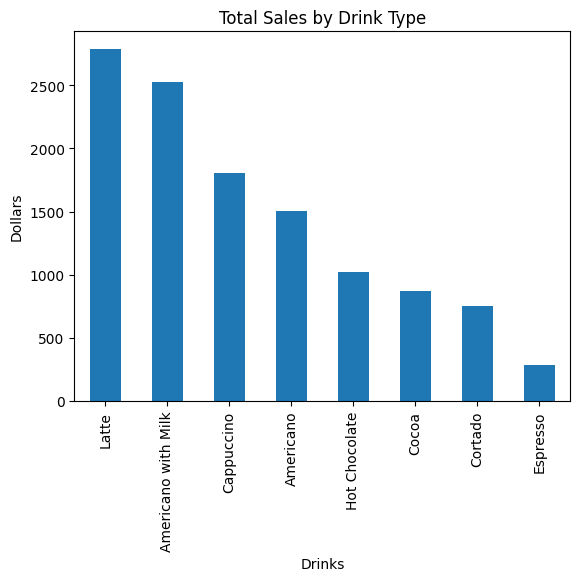

In [120]:
# Plot 1:
grouped_coffee_name.plot(kind='bar',
                         y='money',
                         x='coffee_name',
                         xlabel='Drinks',
                         ylabel='Dollars',
                         legend=False,
                         title='Total Sales by Drink Type')

<Axes: title={'center': 'Top Five Buyers'}, xlabel='Coffees Bought', ylabel='Top Five Buyers'>

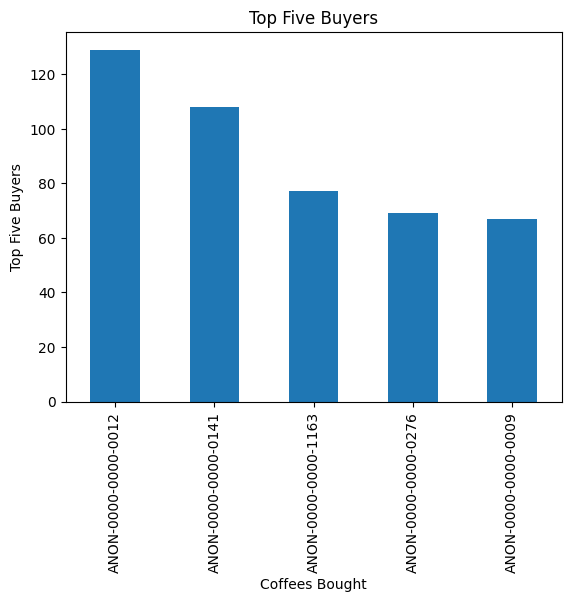

In [121]:
# Plot: 2
grouped_top_buyers = df.card.value_counts()
grouped_top_buyers.head(5).plot(kind='bar',
                        #  y='money',
                        #  x='coffee_name',
                         xlabel='Coffees Bought',
                         ylabel='Top Five Buyers',
                         legend=False,
                         title='Top Five Buyers')

<Axes: title={'center': 'Sales Per Hour'}, xlabel='Hour of Day', ylabel='Total Sales'>

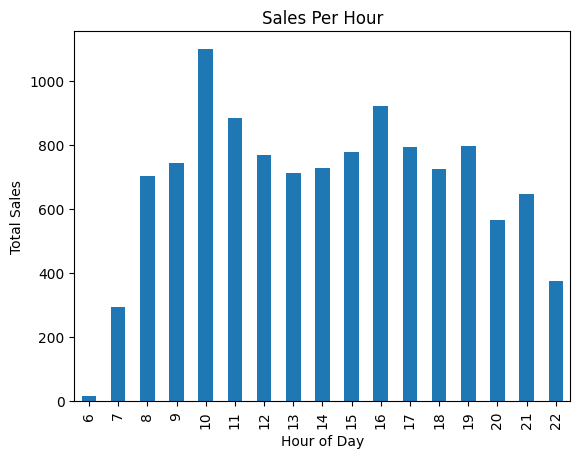

In [122]:
# Plot: 3
hours_df = df
hours_df['hour'] = hours_df['datetime'].dt.hour
hourly_sales = hours_df.groupby('hour')['money'].sum()
hourly_sales.plot(kind='bar',
                    title='Sales Per Hour',
                    xlabel='Hour of Day',
                    ylabel='Total Sales')

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Total Sales'>

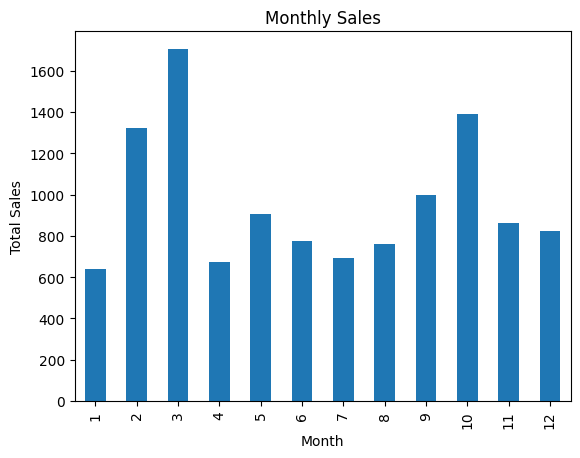

In [123]:
# Plot: 4
months_df = df
months_df['month'] = months_df['datetime'].dt.month
monthly_sales = months_df.groupby('month')['money'].sum()
monthly_sales.plot(kind='bar',
                    title='Monthly Sales',
                    xlabel='Month',
                    ylabel='Total Sales')

TypeError: 'str' object is not callable

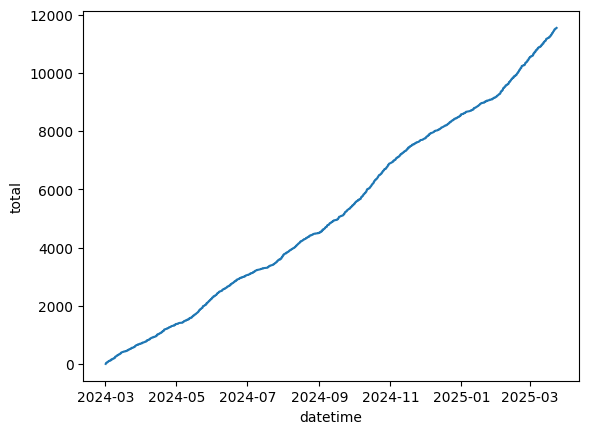

In [127]:
# Plot: 5
daily_sales = df.drop(columns=['cash_type', 'card', 'hour', 'month'])
daily_sales['total'] = daily_sales['money'].cumsum()

daily_sales
sns.lineplot(x='datetime', y='total', data=daily_sales)
#plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()


In [132]:
# Plot 6
grouped_drink_sales = df.drop(columns=['cash_type', 'card', 'hour', 'month'])
grouped_drink_sales

# grouped_drink_sales = df.groupby(['coffee_name','datetime' ])['money'].sum().reset_index()
# plt.figure(figsize=(20,6))
# sns.lineplot(x='datetime', y='money', hue='coffee_name', data=grouped_drink_sales)
# plt.xlabel='Date'
# plt.ylabel='Sales'
# plt.legend(title='Drink Name')
# plt.show()

,datetime,money,coffee_name
0,2024-03-01 10:15:50.520,3.87,Latte
1,2024-03-01 12:19:22.539,3.87,Hot Chocolate
2,2024-03-01 12:20:18.089,3.87,Hot Chocolate
3,2024-03-01 13:46:33.006,2.89,Americano
4,2024-03-01 13:48:14.626,3.87,Latte
...,...,...,...
3631,2025-03-23 10:34:54.894,3.58,Cappuccino
3632,2025-03-23 14:43:37.362,3.58,Cocoa
3633,2025-03-23 14:44:16.864,3.58,Cocoa
3634,2025-03-23 15:47:28.723,2.60,Americano
